----
# Recommender System
-----

INTRO

## Set Up
----

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading
---

In [2]:
df = pd.read_csv('../../data/eda_data.csv', index_col = 0)


## Content Based Recommendations
----

In [36]:
import nltk
import string

# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

# Building a bespoke tokenizer
stemmer = nltk.stem.PorterStemmer()
eng_stop_words = stopwords.words('english')
eng_stop_words.append('headphone')
eng_stop_words.append('headphones')
def my_tokenizer(sentence):
    # to remove numbers from reviews 
    sentence = re.sub('[0-9]','',sentence)
    sentence = re.sub(r'–|—', '', sentence)
    # remove punctuation and set all to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # splitting each sentence by space into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    for word in listofwords:  
        # Filtering out stopwords and any tokens that are just empty strings
        if (word not in eng_stop_words) and (word != ''):
            # Stem words -> cut words to their 'root' 
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simybasra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Perfrom TD-IDF Vectorisation on Description


In [38]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Prevent line wrapping
pd.set_option('display.max_colwidth', None)  # Display full column content


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialise the TfidfVectorizer to convert text into TF-IDF vectors
tfidf = TfidfVectorizer(tokenizer=my_tokenizer, ngram_range=(2, 2) , min_df = 2)

# Fit and transform the 'Description' column
tfidf_matrix = tfidf.fit_transform(df['Description'])

/Users/simybasra/anaconda3/envs/sound_decisions/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
tfidf_matrix.shape

(478, 1119)

In [41]:
tf_idf_df = pd.DataFrame(columns=tfidf.get_feature_names_out(), data=tfidf_matrix.toarray(),index = df.index)

In [54]:
tf_idf_df.head(10)

activ nois  adapt black  adapt nois  adjust children  adjust ear  \
0    0.216672     0.000000         0.0              0.0         0.0   
1    0.250979     0.385602         0.0              0.0         0.0   
2    0.000000     0.000000         0.0              0.0         0.0   
3    0.000000     0.000000         0.0              0.0         0.0   
4    0.000000     0.000000         0.0              0.0         0.0   
5    0.000000     0.000000         0.0              0.0         0.0   
6    0.000000     0.000000         0.0              0.0         0.0   
7    0.000000     0.000000         0.0              0.0         0.0   
8    0.000000     0.000000         0.0              0.0         0.0   
9    0.000000     0.000000         0.0              0.0         0.0   

   adjust foldabl  adjust headband  adjust lightweight  adjust mm  \
0         0.00000              0.0                 0.0        0.0   
1         0.00000              0.0                 0.0        0.0   
2         0.00000              0.0                 0.0        0.0   
3         0.00000              0.0                 0.0        0.0   
4         0.00000              0.0                 0.0        0.0   
5         0.00000              0.0                 0.0        0.0   
6         0.00000              0.0                 0.0        0.0   
7         0.00000              0.0                 0.0        0.0   
8         0.29594              0.0                 0.0        0.0   
9         0.00000              0.0                 0.0        0.0   

   adjust nois  adjust onear  adjust schooltravelphonepcmpblack  \
0          0.0           0.0                                0.0   
1          0.0           0.0                                0.0   
2          0.0           0.0                                0.0   
3          0.0           0.0                                0.0   
4          0.0           0.0                                0.0   
5          0.0           0.0                                0.0   
6          0.0           0.0                                0.0   
7          0.0           0.0                                0.0   
8          0.0           0.0                                0.0   
9          0.0           0.0                                0.0   

   adjust student  adjust wireless  adult adjust  adult black  adult blue  \
0             0.0              0.0           0.0          0.0         0.0   
1             0.0              0.0           0.0          0.0         0.0   
2             0.0              0.0           0.0          0.0         0.0   
3             0.0              0.0           0.0          0.0         0.0   
4             0.0              0.0           0.0          0.0         0.0   
5             0.0              0.0           0.0          0.0         0.0   
6             0.0              0.0           0.0          0.0         0.0   
7             0.0              0.0           0.0          0.0         0.0   
8             0.0              0.0           0.0          0.0         0.0   
9             0.0              0.0           0.0          0.0         0.0   

   adult bluetooth  adult camo  adult children  adult color  adult colour  \
0              0.0         0.0             0.0          0.0           0.0   
1              0.0         0.0             0.0          0.0           0.0   
2              0.0         0.0             0.0          0.0           0.0   
3              0.0         0.0             0.0          0.0           0.0   
4              0.0         0.0             0.0          0.0           0.0   
5              0.0         0.0             0.0          0.0           0.0   
6              0.0         0.0             0.0          0.0           0.0   
7              0.0         0.0             0.0          0.0           0.0   
8              0.0         0.0             0.0          0.0           0.0   
9              0.0         0.0             0.0          0.0           0.0   

   adult ear  adult foldabl

In [57]:
df['Description'][0]

'infurture active noise cancelling headphones, h1 wireless over ear bluetooth headphones, deep bass headset, low latency, memory foam ear cups,40h playtime, for adults, kids, tv, travel, home office'

In [48]:
tfidf.get_feature_names_out()

array(['activ nois', 'adapt black', 'adapt nois', ..., 'yomus c',
       'yowu rgb', 'yunsail pack'], dtype=object)

#### Displaying top N terms

In [42]:
# TODO: put in a function n 
term_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()

In [43]:
terms_df = pd.DataFrame({'term': tfidf.get_feature_names_out(), 'score': term_scores})

In [44]:
top_15_terms = terms_df.sort_values(by = 'score', ascending= False).head(20)

In [45]:
top_15_terms

,term,score
743,nois cancel,12.390666
504,hifi stereo,9.597626
103,bluetooth ear,9.035950
1076,wireless bluetooth,8.702398
962,stereo sound,8.467388
184,cat ear,8.395454
595,led light,8.023156
276,deep bass,7.846290
1079,wireless ear,7.714894
338,ear wireless,7.587415


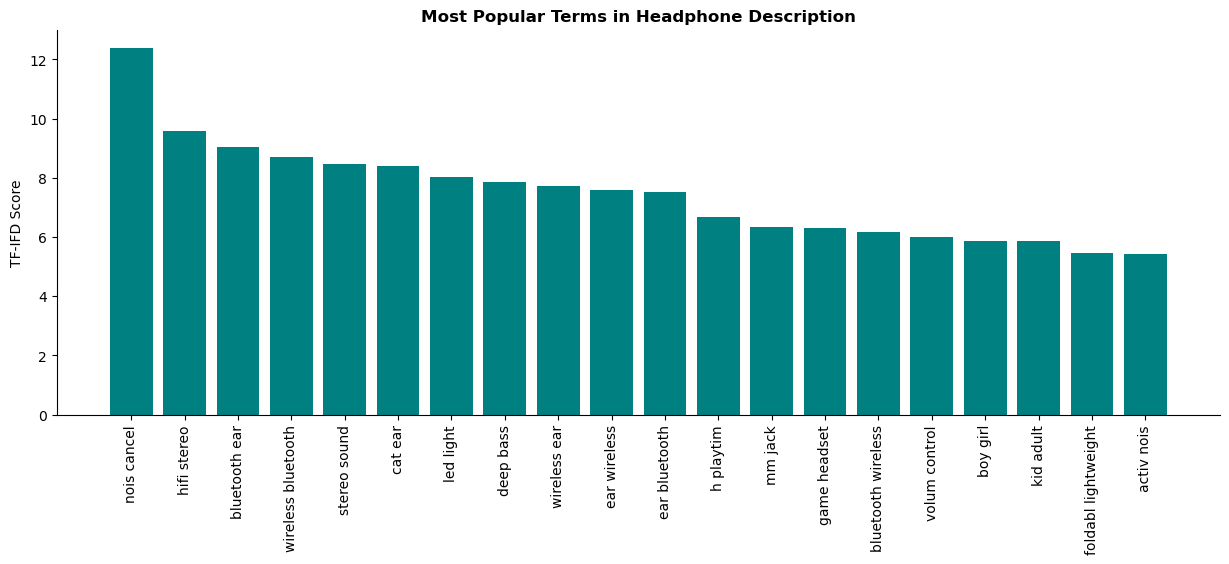

In [46]:
plt.figure(figsize=(15,5))

plt.bar(top_15_terms.term, top_15_terms.score, color = 'teal')
plt.xticks(rotation = 90)
plt.ylabel('TF-IFD Score')
plt.title('Most Popular Terms in Headphone Description', fontweight = 'bold')

ax = plt.gca()
ax.spines[['top','right']].set_visible(False)
plt.show()

----
**Plot Description:**

**Features:**

- Terms like "bluetooth" and "wireless" indicate a strong demand for wireless connectivity. The high frequency of "wireless" across many product descriptions suggests that this feature is increasingly desirable among consumers.
- Additionally, the noise-canceling feature appears popular.
- The term "foldable" also indicates a preference for headphone portability.
- There seems to be an overlap between the features identified in the TD-IDF analysis and those I extracted earlier in the project. The next step involves adding td-idf features to the orginal dataset, its porbably best to drop the features I extracted from the description to avoid redundancuy in the recommendation model.

**Target Audience:**

Interestingly, even when "adult headphones" are specified in the search, many product descriptions still reference "kid,".

**Sound Quality:**
The focus on phrases like "hifi stereo" and "deep bass" suggests grouping of users who prioritise audio quality. 

### Combine output of TF-IDF with df

#### 1. Selecting features to use from df

In [47]:
df.columns

Index(['Product ID', 'Description', 'Rating', 'Is Prime', 'Wireless',
       'Noise Cancelling', 'Battery Life', 'Microphone', 'Over Ear', 'Gaming',
       'Foldable', 'price_trans', 'Colour_Not Specified', 'Colour_Other',
       'Colour_black', 'Colour_blue', 'Colour_gold', 'Colour_green',
       'Colour_pink', 'Colour_purple', 'Colour_red', 'Colour_white'],
      dtype='object')

----
**Comment:**

Following features all are part of the td-idf features, this makes sense as i extracted these from the product description. I will NOT be inckuding these featrures in the recommonder:

- Wireless
- Noise Cancelling
- Microphone
- Over Ear
- Gaming
- Foldable
- All Colour fields

This leaves us with the following features for the recommender:

- Rating
- Is Prime
- Product ID
- price_trans
- Battery Life


#### Scaling of the Numeric Features

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Battery Life','price_trans','Rating', 'Is Prime']])

In [60]:
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=['Battery Life','price_trans','Rating', 'Is Prime'])

#### Combining Scaled Features to TD-IDF df

In [63]:
combined_df = pd.concat([tf_idf_df, scaled_df], axis=1)

### Calculate Cosine Similarity

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(combined_df, dense_output=False)

### Making Recommendations - Content Based only

In [79]:
def content_recommender(product_id, similarities) :

# Find index of the product
    product_index = df[df['Product ID'] == product_id].index

    sim_df = pd.DataFrame(
        {'Product ID': df['Product ID'],
         'Similarity': similarities[product_index, :].flatten(),
         'Rating' :df['Rating']

        })
    
    top_df = sim_df[sim_df['Rating'] >= 4.0].sort_values(by='Similarity', ascending=False).head(10) ## add in rating to be above 4 stars
    return top_df

content_recommender('B08HDBZNZ9',cosine_sim)

## Evaluation - Content Based Recommender
-------

So far in this notebook, I have developed a content-based recommendation system to suggest products similar to a given product. 

Key Highlights:

- **Feature Extraction:** I used TF-IDF to analyse product descriptions and identify important most popular terms. This analysis helped in understanding general customer preferences and highlighted key features that are in demand.

- **Recommendation System:** Use cosine similarity calculations to create a recommender that recommends similar products to an exisitng product ID (to be passed in).

- **Data Limitations:** The only user related information in the dataset is an average user rating for each product. This has impacted the ability to add more complex methods to the recommender model. Additionally, a lack of information on user likes/dislikes makes it rather difficult to evaluate the model built. To me, the only evaluation method available would be through unit testing in the real world. 

In the future it would be worth considering methods to access specific user inforamtion to enhance the recommendation system.

Despite having only the average user ratings for each product, I plan to see if there is a way I can integrate some collaborative filtering methods with the exisiting content-based recommender. Hopefully, this would improve the recommendations made in real time.

## Integrating Collaborative Filtering Methods
-----